<a href="https://colab.research.google.com/github/frostkose/portfolio/blob/main/maintenanceIND40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python-calamine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.0/886.0 kB 9.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
data0=pd.read_excel('/content/class_0/file7.xlsx',engine='calamine')
data0.head()
data1=pd.read_excel('/content/class_1/file499.xlsx',engine='calamine')
data1.head()

,Time,acceleration_vertbleu,acceleration_vert
0,2024-05-20 11:21:48.058,0.002102,-0.030239
1,2024-05-20 11:21:48.058,0.089615,-0.032117
2,2024-05-20 11:21:48.058,0.076259,0.040900
3,2024-05-20 11:21:48.058,0.102726,0.004303
4,2024-05-20 11:21:48.058,0.065160,0.000199


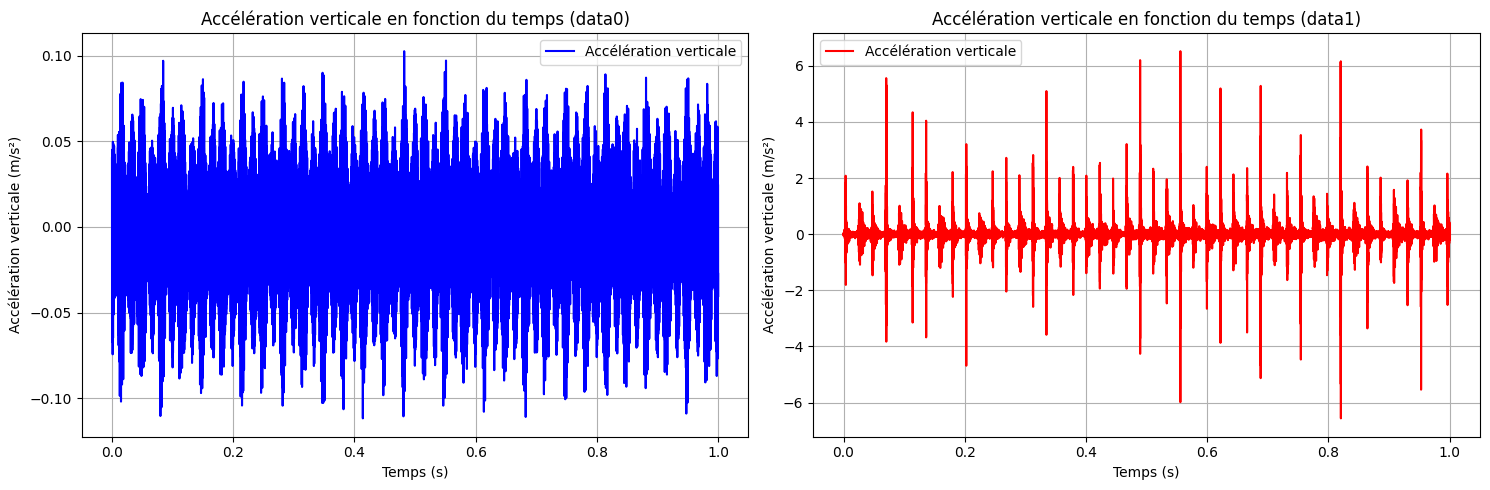

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df est déjà défini comme data0
# Exemple : df = pd.read_excel("ton_fichier.xlsx", engine='openpyxl')

# Fréquence d’échantillonnage
fe = 25600  # en Hz
dt = 1 / fe  # pas de temps en secondes

# Créer l’axe du temps à partir du nombre de lignes dans df
data0['temps_reconstruit'] = np.arange(len(data0)) * dt  # en secondes
data1['temps_reconstruit'] = np.arange(len(data1)) * dt  # en secondes

# Créer une figure avec 2 sous-graphes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Tracer l'accélération verticale pour data0
axes[0].plot(data0['temps_reconstruit'], data0['acceleration_vert'], color='blue', label='Accélération verticale')
axes[0].set_xlabel("Temps (s)")
axes[0].set_ylabel("Accélération verticale (m/s²)")
axes[0].set_title("Accélération verticale en fonction du temps (data0)")
axes[0].grid(True)
axes[0].legend()

# Tracer l'accélération verticale pour data1
axes[1].plot(data1['temps_reconstruit'], data1['acceleration_vert'], color='red', label='Accélération verticale')
axes[1].set_xlabel("Temps (s)")
axes[1].set_ylabel("Accélération verticale (m/s²)")
axes[1].set_title("Accélération verticale en fonction du temps (data1)")
axes[1].grid(True)
axes[1].legend()

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [5]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Signal : accélération verticale
signal0 = data0['acceleration_vert'].values
signal1 = data1['acceleration_vert'].values

# Nombre de points
N = len(signal0)

# Fréquence d’échantillonnage
fe = 25600  # Hz
dt = 1 / fe

# Appliquer la transformée de Fourier pour data0
fft_vals0 = np.fft.fft(signal0)
fft_vals0 = np.abs(fft_vals0) / N  # Normalisation

# Appliquer la transformée de Fourier pour data1
fft_vals1 = np.fft.fft(signal1)
fft_vals1 = np.abs(fft_vals1) / N  # Normalisation

# Fréquences associées
freqs = np.fft.fftfreq(N, d=dt)

# Garder les fréquences positives uniquement
half_N = N // 2
fft_vals0 = fft_vals0[:half_N]
fft_vals1 = fft_vals1[:half_N]
freqs = freqs[:half_N]

# Créer des sous-graphes pour séparer les deux FFT
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Spectre FFT - data0", "Spectre FFT - data1"))

# Ajouter le spectre FFT de data0
fig.add_trace(go.Scatter(
    x=freqs,
    y=fft_vals0,
    mode='lines',
    name='Spectre FFT - data0',
    line=dict(color='purple')
), row=1, col=1)

# Ajouter le spectre FFT de data1
fig.add_trace(go.Scatter(
    x=freqs,
    y=fft_vals1,
    mode='lines',
    name='Spectre FFT - data1',
    line=dict(color='blue')
), row=1, col=2)

# Mise en forme
fig.update_layout(
    title="Spectres de fréquence (FFT) interactifs",
    xaxis_title="Fréquence (Hz)",
    yaxis_title="Amplitude",
    template='plotly_white',
    hovermode='x',
    dragmode='zoom',  # Permet de zoomer à la souris
    showlegend=False
)

fig.show()


In [10]:
# prompt: iterate through the file "classe_0" containing the files and make a table illustrating RMS,Moy,skeur,kutosis

import pandas as pd
import os
import numpy as np

def analyze_file(filepath):
    try:
        data = pd.read_excel(filepath, engine='calamine')
        signal = data['acceleration_vert'].values
        rms = np.sqrt(np.mean(signal**2))
        moy = np.mean(signal)
        max_value = np.max(signal)
        min_value = np.min(signal)
        skewness = pd.Series(signal).skew()
        kurtosis = pd.Series(signal).kurt()

        return rms, moy, max_value,min_value,skewness, kurtosis
    except Exception as e:
        print(f"Error processing {filepath}: {e}")
        # Return None for all 6 expected values to avoid unpacking error
        return None, None, None, None, None, None


results0 = []
# Assuming 'classe_0' is a directory containing the Excel files
for filename in os.listdir('/content/class_0'):
    if filename.endswith(('.xls', '.xlsx')):
        filepath = os.path.join('/content/class_0', filename) # Changed to include full path
        rms, moy,max_value,min_value, skewness, kurtosis = analyze_file(filepath)
        if rms is not None :
            results0.append([filename, rms, moy, max_value,min_value,skewness, kurtosis])


# Create a DataFrame
df_results0 = pd.DataFrame(results0, columns=['Filename', 'RMS', 'Moy','Max','Min', 'Skewness', 'Kurtosis'])

# Display or save the DataFrame
df_results0
# df_results.to_csv('analysis_results.csv', index=False) #Optional: Save to CSV

,Filename,RMS,Moy,Max,Min,Skewness,Kurtosis
0,file598.xlsx,0.029210,-0.003688,0.097190,-0.125303,-0.123184,0.295346
1,file7.xlsx,0.028939,-0.003779,0.102587,-0.111813,-0.126344,0.188982
2,file90.xlsx,0.029126,-0.003741,0.097879,-0.120632,-0.124072,0.258047


In [11]:
# prompt: convert the 'df_results' inti excel file

# Convert the DataFrame to an Excel file
df_results0.to_excel('df_results0.xlsx', index=False)


In [12]:
results1 = []
# Assuming 'classe_0' is a directory containing the Excel files
for filename in os.listdir('/content/class_1'):
    if filename.endswith(('.xls', '.xlsx')):
        filepath = os.path.join('/content/class_1', filename) # Changed to include full path
        rms, moy,max_value,min_value, skewness, kurtosis = analyze_file(filepath)
        if rms is not None :
            results1.append([filename, rms, moy, max_value,min_value,skewness, kurtosis])


# Create a DataFrame
df_results1 = pd.DataFrame(results1, columns=['Filename', 'RMS', 'Moy','Max','Min', 'Skewness', 'Kurtosis'])

# Display or save the DataFrame
df_results1
# df_results.to_csv('analysis_results.csv', index=False) #Optional: Save to CSV

,Filename,RMS,Moy,Max,Min,Skewness,Kurtosis
0,file12.xlsx,0.332897,-0.002439,6.135220,-6.692095,-0.241934,66.271110
1,file200.xlsx,0.317921,-0.002681,4.925843,-5.654044,0.143238,46.430368
2,file499.xlsx,0.360184,-0.003315,6.520288,-6.564550,0.295922,63.101000


In [13]:
df_results1.to_excel('df_results1.xlsx', index=False)
